In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x217214af550>)

In [3]:
train_data = pd.read_table('ratings.txt')

In [4]:
train_data[:10] # 상위 10개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [5]:
print(len(train_data)) # 리뷰 개수 출력

200000


In [6]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [7]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^가-힣 ]","")

In [8]:
# 불용어 정의
file=open('bool.txt','r',encoding='UTF8')
stopwords=file.readlines()[0].split(' ')
file.close()

In [9]:
# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()
tokenized_data = []
for sentence in train_data['document']:
    temp_X = okt.nouns(sentence) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

리뷰의 최대 길이 : 66
리뷰의 평균 길이 : 4.955713228529141


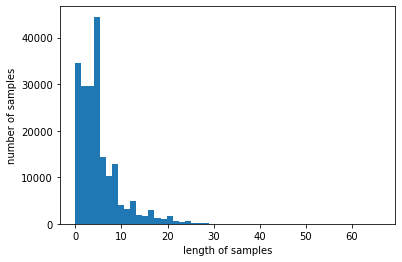

In [10]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [11]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 15, workers = 4, sg = 0)

In [12]:
print(model.wv.most_similar(positive=["배우","연기자"]))

[('조연', 0.9137784838676453), ('발', 0.8977747559547424), ('일품', 0.8794846534729004), ('대본', 0.8678257465362549), ('아역', 0.8594526052474976), ('발연기', 0.8575736880302429), ('배역', 0.849500834941864), ('주연', 0.8494434356689453), ('감탄', 0.8477575778961182), ('엄정화', 0.8362584710121155)]


In [13]:
print(model.wv.most_similar("재미"))

[('그다지', 0.7037208080291748), ('그닥', 0.7011772394180298), ('코드', 0.6944949626922607), ('억지', 0.6937729120254517), ('지도', 0.6899267435073853), ('감흥', 0.6819230914115906), ('교훈', 0.675428032875061), ('대안', 0.6743414998054504), ('웃기', 0.6726709604263306), ('뭣', 0.6647630333900452)]


In [14]:
print(model.wv.most_similar(positive=["악역"]))

[('역할', 0.9125076532363892), ('조연', 0.9124597311019897), ('케미', 0.8901832103729248), ('배역', 0.8901321291923523), ('카리스마', 0.887681782245636), ('엄정화', 0.8862075209617615), ('미스캐스팅', 0.8786008954048157), ('권상우', 0.8782928586006165), ('송강호', 0.8685511350631714), ('소화', 0.8682136535644531)]


In [16]:
print(model.wv.most_similar("배역"))

[('소화', 0.9550654888153076), ('미스', 0.9532673358917236), ('일품', 0.9477635622024536), ('비쥬', 0.9379638433456421), ('역할', 0.9248846769332886), ('비주', 0.9224307537078857), ('미스캐스팅', 0.9217882752418518), ('송강호', 0.9175822734832764), ('중견', 0.9173901677131653), ('외모', 0.9165104627609253)]


In [17]:
print(model.wv.most_similar(positive=["각본"],topn=10))

[('시나리오', 0.9348654747009277), ('연출', 0.8836301565170288), ('역량', 0.8747358918190002), ('극본', 0.8650991320610046), ('촬영', 0.8596847057342529), ('대본', 0.8566546440124512), ('얼', 0.8514702916145325), ('체적', 0.8505178689956665), ('비주', 0.8500397205352783), ('비쥬', 0.8395482897758484)]


In [18]:
print(model.wv.most_similar(positive=["스토리","전개"],topn=10))

[('개연', 0.901341438293457), ('전개도', 0.8988195657730103), ('술', 0.8881721496582031), ('진행', 0.8775141835212708), ('엉망', 0.8712534308433533), ('구성', 0.8677244782447815), ('흥미', 0.8643865585327148), ('성도', 0.8627769351005554), ('짜임새', 0.8571638464927673), ('설정', 0.8569371104240417)]


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


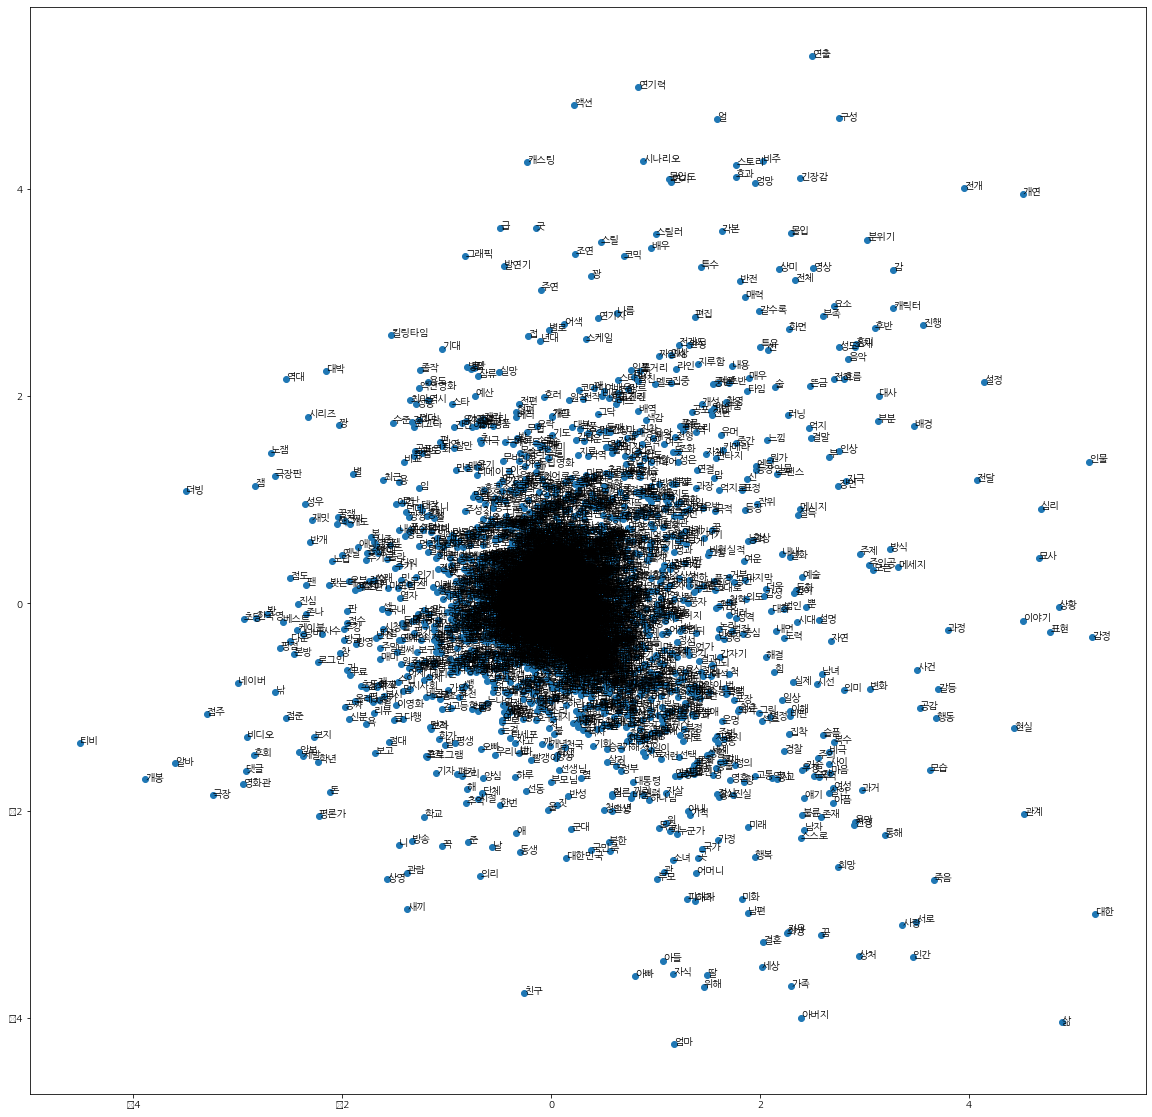

In [19]:
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys=xys[:,1]

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
fm._rebuild()

plt.rc('font', family='NanumGothic')

import matplotlib.pyplot as plt

def plot_2d_graph(vocabs, xs, ys):
    plt.figure(figsize=(20,20))
    plt.scatter(xs,ys,marker='o')
    for i,v in enumerate(vocabs):
        plt.annotate(v,xy=(xs[i], ys[i]))
        
plot_2d_graph(vocabs, xs,ys)